In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tuner-results/fairness_metrics.csv
/kaggle/input/tuner-results/model_performance.csv


In [2]:
results = pd.read_csv("/kaggle/input/tuner-results/model_performance.csv")
fair_results = pd.read_csv("/kaggle/input/tuner-results/fairness_metrics.csv")

In [3]:
results

,Model,Accuracy,Precision,Recall
0,CNN,0.9081,0.9077,0.9081
1,RNN,0.9528,0.9536,0.9528
2,GRU,0.9580,0.9585,0.9580
3,LSTM,0.9601,0.9608,0.9601
4,MLP,0.9414,0.9431,0.9414


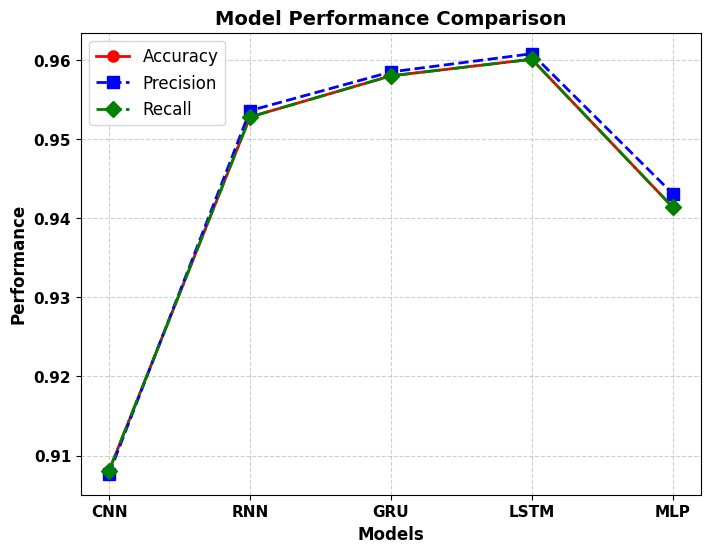

In [4]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(8, 6))

# Plot lines with markers using 'results' DataFrame values
plt.plot(results["Model"], results["Accuracy"], marker='o', linestyle='-', linewidth=2, markersize=8, label="Accuracy", color="red")
plt.plot(results["Model"], results["Precision"], marker='s', linestyle='--', linewidth=2, markersize=8, label="Precision", color="blue")
plt.plot(results["Model"], results["Recall"], marker='D', linestyle='-.', linewidth=2, markersize=8, label="Recall", color="green")

# Add labels and title
plt.xlabel("Models", fontsize=12, fontweight="bold")
plt.ylabel("Performance", fontsize=12, fontweight="bold")
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")

# Set grid and legend
plt.xticks(fontsize=11, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)

# Show plot
plt.show()


In [5]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to fit the screen
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping
fair_results = fair_results.drop(fair_results.index[2::2])
fair_results = fair_results.reset_index(drop=True)

In [6]:
df = df = fair_results[['Description', fair_results.columns[4]]]
df

,Description,Disparate Impact
0,Ideal Values,1.000000
1,MLP GENDER Mitigation,0.813357
2,MLP Reweighed GENDER Mitigation,0.782578
3,MLP DIR AGE Mitigation,1.099182
4,MLP AGE&GENDER Mitigation,1.106402
5,MLP Reweighed AGE&GENDER Mitigation,1.064872
6,GRU DIR GENDER Mitigation,0.784576
7,GRU AGE Mitigation,1.133625
8,GRU Reweighed AGE Mitigation,1.113970
9,GRU DIR AGE&GENDER Mitigation,1.025110
